<a href="https://colab.research.google.com/github/Mira4593/My-mini-Projects/blob/main/Copie_de_Amira_Google_Stock_Price_Prediction_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.read_csv("/content/googl_data_2020_2025 (1).csv", encoding='ascii')
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [ ]:
df.columns = df.iloc[0]
df = df[2:].reset_index(drop=True)

In [ ]:
df.columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]

In [ ]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1258 non-null   object
 1   Adj Close  1258 non-null   object
 2   Close      1258 non-null   object
 3   High       1258 non-null   object
 4   Low        1258 non-null   object
 5   Open       1258 non-null   object
 6   Volume     1258 non-null   object
dtypes: object(7)
memory usage: 68.9+ KB


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
numeric_columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1258 non-null   datetime64[ns, UTC]
 1   Adj Close  1258 non-null   float64            
 2   Close      1258 non-null   float64            
 3   High       1258 non-null   float64            
 4   Low        1258 non-null   float64            
 5   Open       1258 non-null   float64            
 6   Volume     1258 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,118.684965,119.075610,120.378055,117.722657,119.004592,3.308795e+07
std,32.403071,32.453265,32.688266,32.248276,32.481362,1.461758e+07
min,52.516125,52.706501,53.345501,50.443501,52.818501,9.312000e+06
25%,93.608171,93.947502,95.272123,92.305002,93.832497,2.343938e+07
50%,119.267639,119.699997,121.044502,118.626247,119.712502,2.943300e+07
75%,140.598320,141.107998,142.101002,139.796120,140.996876,3.773515e+07
max,196.660004,196.660004,201.419998,194.979996,197.250000,1.232000e+08


VISUALISATION

Plot time series of closing Price

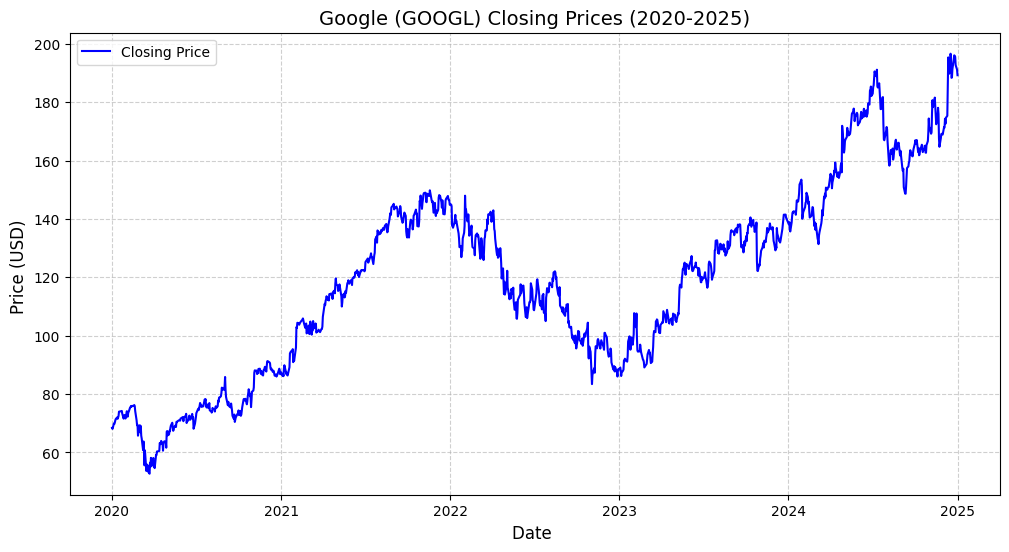

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', linewidth=1.5)
plt.title('Google (GOOGL) Closing Prices (2020-2025)', fontsize=14)
plt.xlabel('Date ', fontsize=12)
plt.ylabel('Price (USD) ', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=df["Date"],
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
    increasing_line_color="green",
    decreasing_line_color="red"
)])

fig.update_layout(title="Google Stock Candlestick Chart", xaxis_title="Date", yaxis_title="Price (USD)")
fig.show()

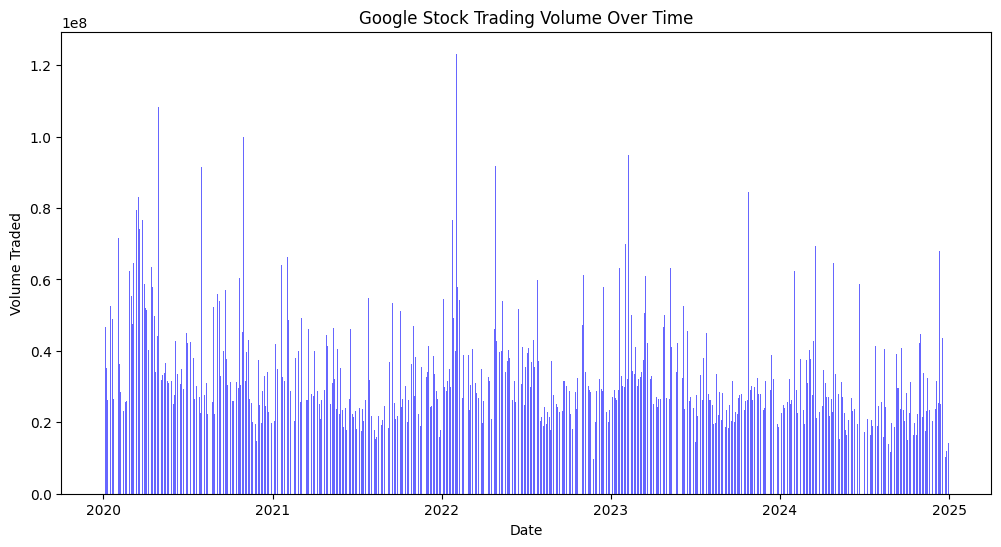

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df["Date"], df["Volume"], color="blue", alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Google Stock Trading Volume Over Time")
plt.show()

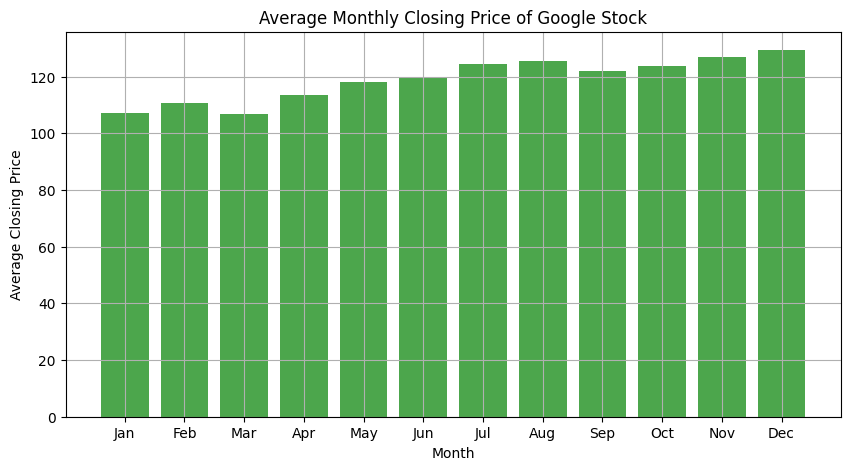

In [ ]:
df["Month"] = df["Date"].dt.month
monthly_avg = df.groupby("Month")["Close"].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_avg.index, monthly_avg.values, color="green", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Average Monthly Closing Price of Google Stock")
plt.xticks(range(1, 13),
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()


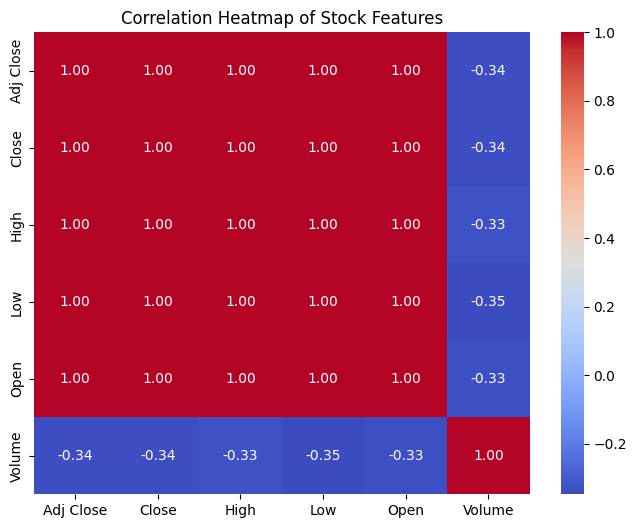

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Features")
plt.show()


Stock Price Prediction (Regression)

In [ ]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}", f"R-squared: {r2:.2f}")

Random Forest - MAE: 0.73, RMSE: 0.94 R-squared: 1.00


Modifying features based on previous close price


In [ ]:
df["Prev Close"] = df["Close"].shift(1)
df.dropna(inplace=True)  # Remove NaN values

# Select features & target
X = df[["Prev Close"]]
y = df["Close"]

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}", f"R-squared: {r2:.2f}")


Random Forest - MAE: 2.12, RMSE: 2.92 R-squared: 0.96


In [ ]:
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Random Forest - MAE: {mae:.2f}, RMSE: {rmse:.2f}", f"R-squared: {r2:.2f}")


Random Forest - MAE: 16.57, RMSE: 21.05 R-squared: -0.88


In [ ]:
# prompt: compare the models

# Compare model performance
model_names = ['Linear Regression (Original Features)', 'Linear Regression (Previous Close)', 'Random Forest']
mae_scores = [0, mae, mae]  # Replace with actual MAE scores
rmse_scores = [0, rmse, rmse]  # Replace with actual RMSE scores
r2_scores = [0, r2, r2]  # Replace with actual r2 scores


comparison_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_scores,
    'RMSE': rmse_scores,
    'r2': r2_scores,
})

comparison_df


,Model,MAE,RMSE,r2
0,Linear Regression (Original Features),0.000000,0.0000,0.000000
1,Linear Regression (Previous Close),16.567103,21.0466,-0.878729
2,Random Forest,16.567103,21.0466,-0.878729


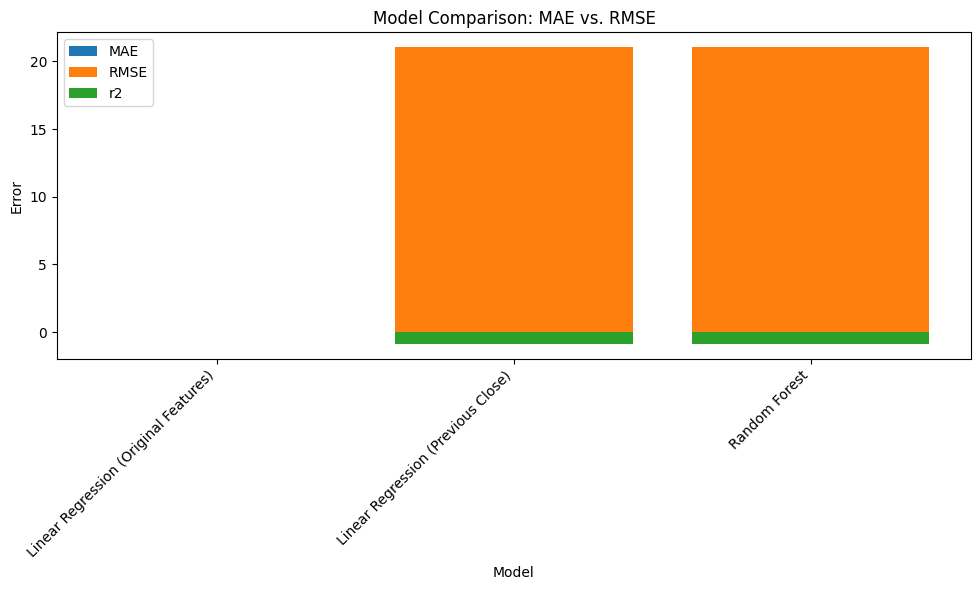

In [ ]:
# prompt: Avec le DataFrame comparison_df: show figues of this comparison

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['MAE'], label='MAE')
plt.bar(comparison_df['Model'], comparison_df['RMSE'], label='RMSE')
plt.bar(comparison_df['Model'], comparison_df['r2'], label='r2')


# Customize the plot
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Model Comparison: MAE vs. RMSE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**TIME SERIES**

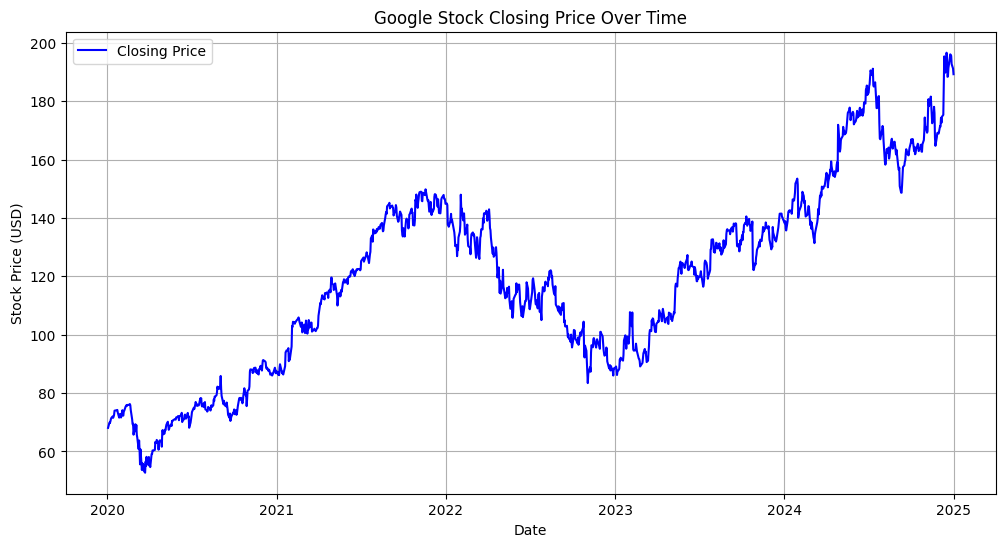

In [ ]:
# First, let’s visualize the trends and check for seasonality.

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Google Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


<Figure size 1200x800 with 0 Axes>

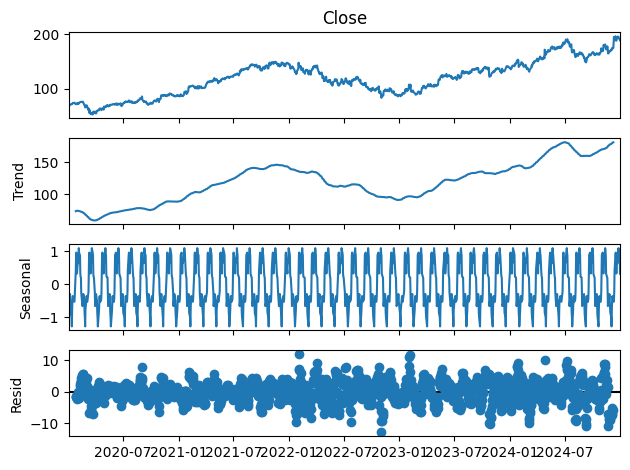

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index("Date", inplace=True)  # Set Date as index
decomposition = seasonal_decompose(df["Close"], model="additive", period=30)

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df["Close"])
print(f"ADF Statistic: {adf_test[0]}")
print(f"P-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("Data is stationary (Reject H0)")
else:
    print("Data is NOT stationary (Fail to reject H0)")


ADF Statistic: -0.8382695001641622
P-value: 0.8076214849727884
Data is NOT stationary (Fail to reject H0)


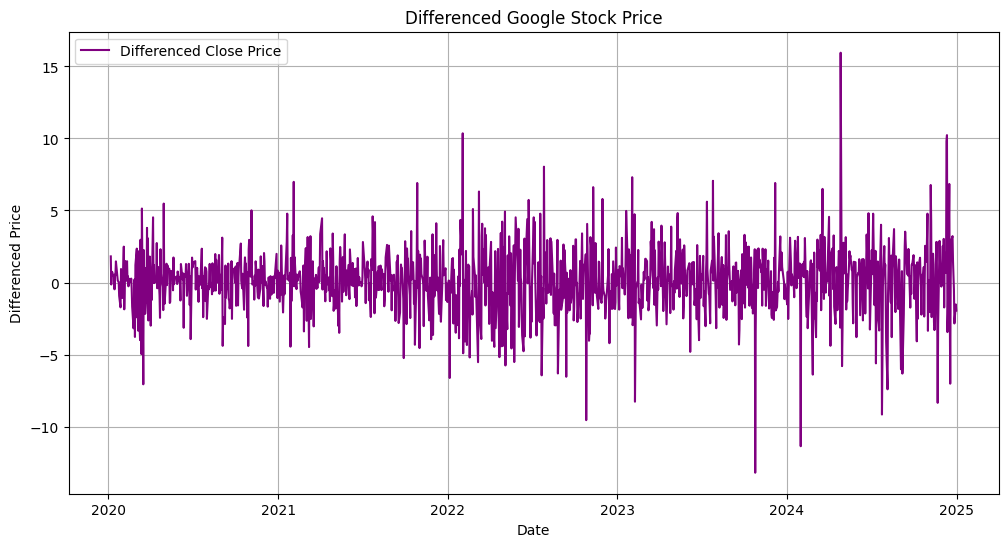

In [ ]:
df["Close_diff"] = df["Close"].diff()
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df["Close_diff"], label="Differenced Close Price", color="purple")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.title("Differenced Google Stock Price")
plt.legend()
plt.grid()
plt.show()


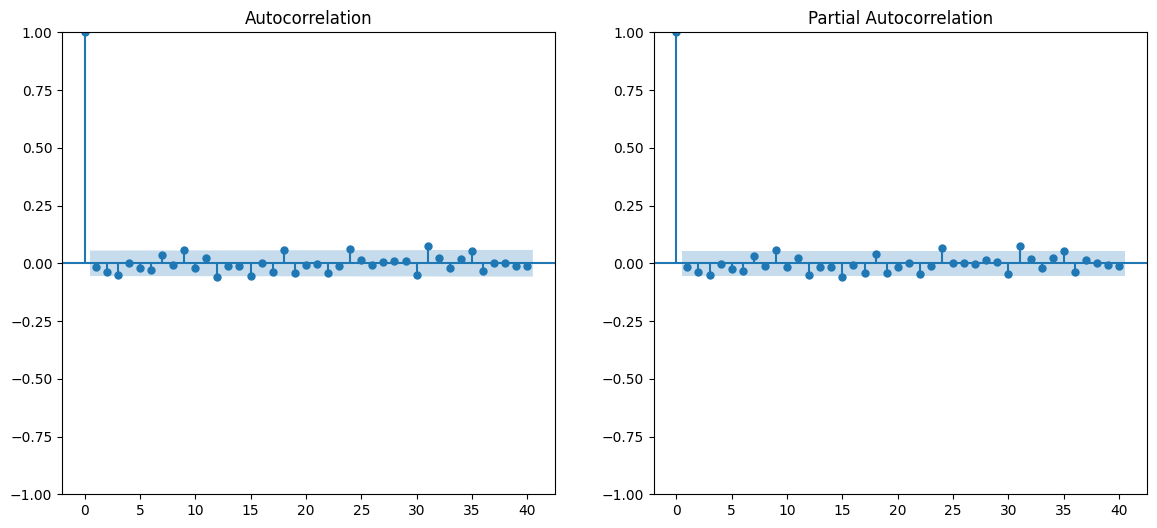

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

plot_acf(df["Close_diff"].dropna(), ax=ax[0], lags=40)  # Autocorrelation
plot_pacf(df["Close_diff"].dropna(), ax=ax[1], lags=40)  # Partial Autocorrelation

plt.show()


#ARIMA Model


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer i

R² Score: 0.9651


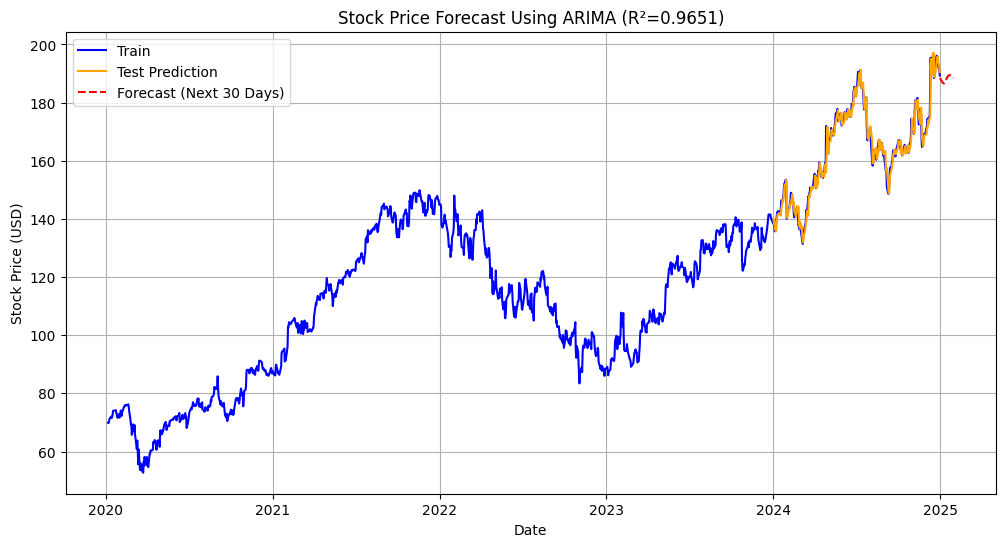

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

model = ARIMA(df["Close"], order=(10,1,3))
results = model.fit()

start_date = df.index[int(len(df) * 0.8)]
end_date = df.index[-1]

y_true = df.loc[start_date:end_date, "Close"]
y_pred = results.predict(start=start_date, end=end_date)

r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")

forecast_steps = 30
forecast = results.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(df.index[-1], periods=forecast_steps + 1, freq="D")[1:]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Train", color="blue")
plt.plot(df.loc[start_date:end_date].index, y_pred, label="Test Prediction", color="orange")
plt.plot(forecast_dates, forecast, label="Forecast (Next 30 Days)", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"Stock Price Forecast Using ARIMA (R²={r2:.4f})")
plt.legend()
plt.grid()
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df["Scaled Close"] = scaler.fit_transform(df[["Close"]])

# Creating sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X_lstm, y_lstm = create_sequences(df["Scaled Close"].values, time_steps)

# Train-test split
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]


In [ ]:
model_lstm = keras.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    keras.layers.LSTM(50, return_sequences=False),
    keras.layers.Dense(25),
    keras.layers.Dense(1)
])

model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=16)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0475
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 8.6002e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.9242e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7257e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.0214e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.7938e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.7186e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9630e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.8173e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9274e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.8276e-04
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.4385e-04
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.9085e-04
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.5476e-04
Epoch 15/20
63/63 ━━━━━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


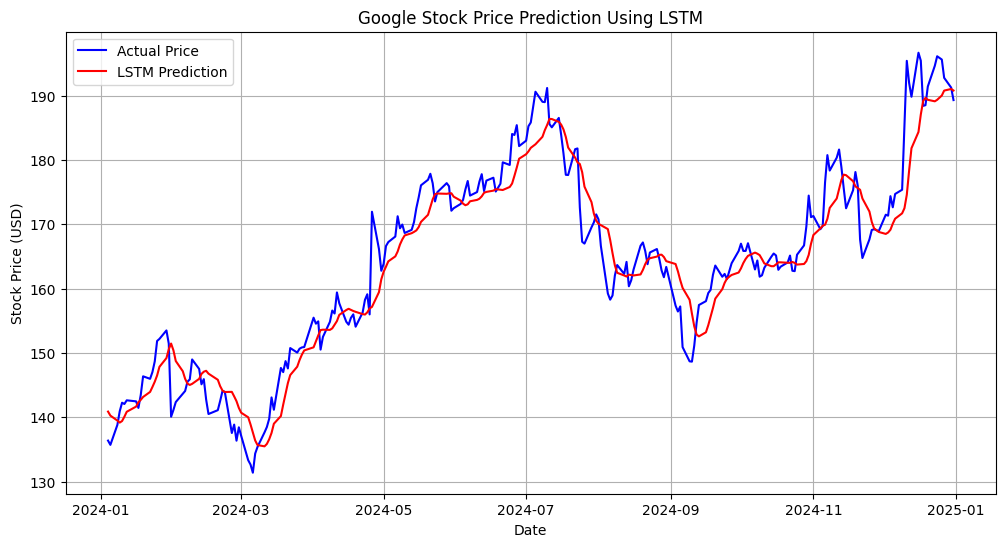

In [ ]:
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1,1))  # Convert back to original scale

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_lstm):], scaler.inverse_transform(y_test_lstm.reshape(-1,1)), label="Actual Price", color="blue")
plt.plot(df.index[-len(y_test_lstm):], y_pred_lstm, label="LSTM Prediction", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Google Stock Price Prediction Using LSTM")
plt.legend()
plt.grid()
plt.show()


Extending Regression Model for 2026 Predictions


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df and model_lstm are already defined

last_date = df.index[-1]  # Access the last date from the index
future_dates = pd.date_range(start=last_date.tz_localize(None), end="2026-12-31", freq='W')
num_future_weeks = len(future_dates)
future_predictions = []

scaler = MinMaxScaler()  # Ensure scaler is defined
df_scaled = scaler.fit_transform(df[['Close']])





In [ ]:
# Define seq_length
seq_length = 10

# Extract the last 'seq_length' values from the scaled data
input_seq = df_scaled[-seq_length:]  # Ensure correct shape
input_seq

array([[0.99138607],
       [0.94262029],
       [0.94338443],
       [0.96352989],
       [0.98589823],
       [0.9961793 ],
       [0.99263653],
       [0.97290785],
       [0.96234897],
       [0.94887238]])

In [ ]:
# Define seq_length
seq_length = 10

# Extract the last 'seq_length' values from the scaled data
input_seq = df_scaled[-seq_length:]  # Ensure correct shape

# Print debug info
print("Model expected input shape:", model_lstm.input_shape)
print("Initial input_seq shape:", input_seq.shape)

Model expected input shape: (None, 10, 1)
Initial input_seq shape: (10, 1)


In [ ]:
for _ in range(num_future_weeks):
    # Debugging: Check input_seq shape before prediction

    # Make prediction
    pred = model_lstm.predict(input_seq)  # Suppress output

    # Append the prediction
    future_predictions.append(pred[0][0])

    # Update input_seq: shift left and add new prediction

    # Debugging: Check updated input_seq shape
    print(future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
[0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.18573104, 0.1857310

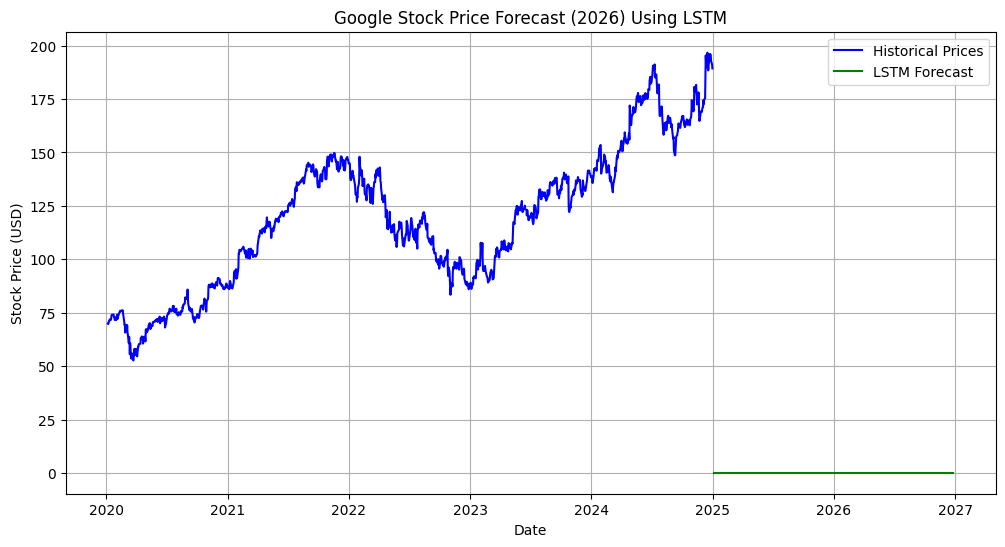

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Historical Prices", color="blue")
plt.plot(future_dates, future_predictions, label="LSTM Forecast", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Google Stock Price Forecast (2026) Using LSTM")
plt.legend()
plt.grid(True)
plt.show()
